In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset=pd.read_csv("~/python/clustering/dataset/segmentation data.csv")

In [4]:
dataset.head()
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


*sex: 1=female 0=male 

*Marital Status:0 = Unmarried 1 = Married

*Age: Age of Customer

*Education

0 = Primary

1 = middle school

2 = high school

3 = college/graduation

*Income: Income of each customer

*Occupation

0 = Tertiary

1 = Primary

2 = Secondary Occupation

*Settlement size

0 = Urban

1 = Mixed

2 = Rural

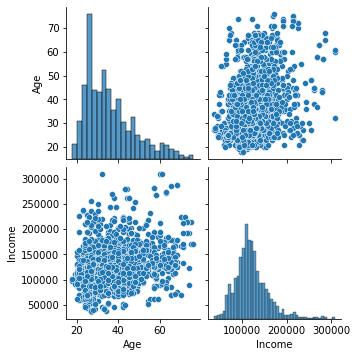

In [5]:
sns.pairplot(dataset[["Age","Income"]])
#data visualize

In [9]:

dataset.iloc[:,[3,5]]=(dataset.iloc[:,[3,5]]-dataset.iloc[:,[3,5]].min())/(dataset.iloc[:,[3,5]].max()-dataset.iloc[:,[3,5]].min())
dataset.iloc[:,4]=dataset.iloc[:,4]/3
dataset.iloc[:,3]=dataset.iloc[:,3]*2
dataset.iloc[:,5]=5*(dataset.iloc[:,5])
dataset.head()
#normalize and weight data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,1.689655,0.222222,1.623905,1,2
1,100000002,1,1,0.137931,0.111111,2.101052,1,2
2,100000003,0,0,1.068966,0.111111,0.975718,0,0
3,100000004,0,0,0.931034,0.111111,2.481117,1,1
4,100000005,0,0,1.206897,0.111111,2.069209,1,1


In [10]:
x=dataset.iloc[:,[1,2,3,4,5,6,7]].values.reshape(-1,7)


print(x[:,:])
#extract data

[[0.         0.         1.68965517 ... 1.62390506 1.         2.        ]
 [1.         1.         0.13793103 ... 2.10105216 1.         2.        ]
 [0.         0.         1.06896552 ... 0.97571765 0.         0.        ]
 ...
 [0.         0.         0.44827586 ... 0.92435254 0.         0.        ]
 [1.         1.         0.20689655 ... 1.13580861 0.         0.        ]
 [0.         0.         0.24137931 ... 0.59561587 0.         0.        ]]


In [23]:
kmeans_model=KMeans(n_clusters=7,init="random",n_init=20,max_iter=100000)
#create model

In [24]:
kmeans_model=kmeans_model.fit(dataset.iloc[:,[3,4,5]])
#fit model

In [25]:
kmeans_model.cluster_centers_
#calc centroids

array([[1.02693179, 0.1540957 , 1.36477273],
       [1.39219184, 0.20817369, 2.12687601],
       [0.45640171, 0.08996307, 0.68680836],
       [0.60120914, 0.11760462, 2.57798418],
       [0.50767682, 0.09894566, 1.82324696],
       [1.00395704, 0.15300546, 3.80537339],
       [0.3326572 , 0.09131653, 1.28087968]])

In [26]:
dataset["clusters"]=kmeans_model.labels_
#add centroid column

In [27]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,100000001,0,0,1.689655,0.222222,1.623905,1,2,1
1,100000002,1,1,0.137931,0.111111,2.101052,1,2,4
2,100000003,0,0,1.068966,0.111111,0.975718,0,0,0
3,100000004,0,0,0.931034,0.111111,2.481117,1,1,3
4,100000005,0,0,1.206897,0.111111,2.069209,1,1,1


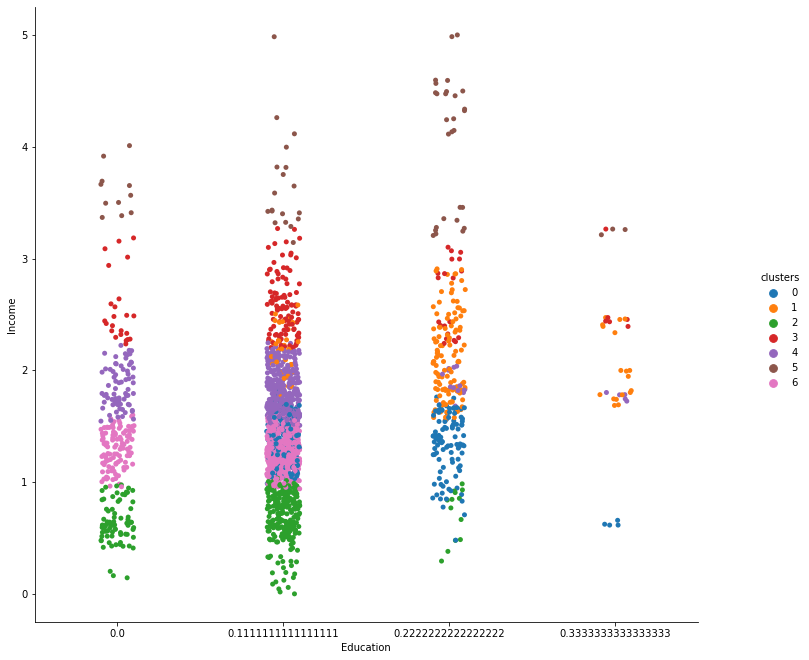

In [28]:
g = sns.catplot(data=dataset, x='Education',
                y='Income', hue='clusters')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#color table